# Iris

El problema de clasificación Iris es un clásico en el ámbito del aprendizaje automático y se utiliza comúnmente como un ejemplo para ilustrar técnicas de clasificación. Este conjunto de datos contiene tres especies de flores Iris (Iris setosa, Iris versicolor e Iris virgínica), con un total de 150 muestras. Cada muestra está definida por cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

Los valores de los hiperparámetros con los que obtuve los resultados son:
- Optimizador: SGD
- Learning rate: 0.00001
- Epochs :  5000
- Función de Activación : Tanh
- Capas de la Red : 4
- Neuronas de cada capa : 4, 8, 8 y 3

In [1]:
import numpy as np
from main.neural_network import train, predict
from main.nn_components.network_layer import FullyConnectedLayer
from main.nn_components.activations_functions import Relu, Tanh
from main.nn_components.loss_functions import mse_derivative, mse
from sklearn.model_selection import train_test_split
from main.nn_components.graphic_regression import learning_curve
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from main.nn_components.graphic_classification import display_confusion_matrix_iris

In [ ]:
X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


X_train = np.reshape(X_train, (112, 4, 1))
X_test = np.reshape(X_test, (38, 4, 1))

y_train = np.reshape(y_train, (112, 3, 1))
y_test = np.reshape(y_test, (38, 3, 1))


nn = [
    FullyConnectedLayer(4, 8),
    Tanh(),
    FullyConnectedLayer(8, 8),
    Tanh(),
    FullyConnectedLayer(8, 3),
    Tanh()
    
]

In [15]:
train_loss = train(nn, mse, mse_derivative, X_train, y_train, epochs=5000, learning_rate=0.00001, optim='sgd')

Final Loss = 0.04040936735465602


In [16]:
correct_predictions = 0
total_predictions = len(X_test)

y_pred = []
y_true = []

for x, y in zip(X_test, y_test):
    output = predict(nn, x)
    predicted_class = np.argmax(output)
    true_class = np.argmax(y)
    y_true.append(true_class)
    y_pred.append(predicted_class)

    if predicted_class == true_class:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {round(accuracy*100, 2)}%')



Accuracy: 94.74%


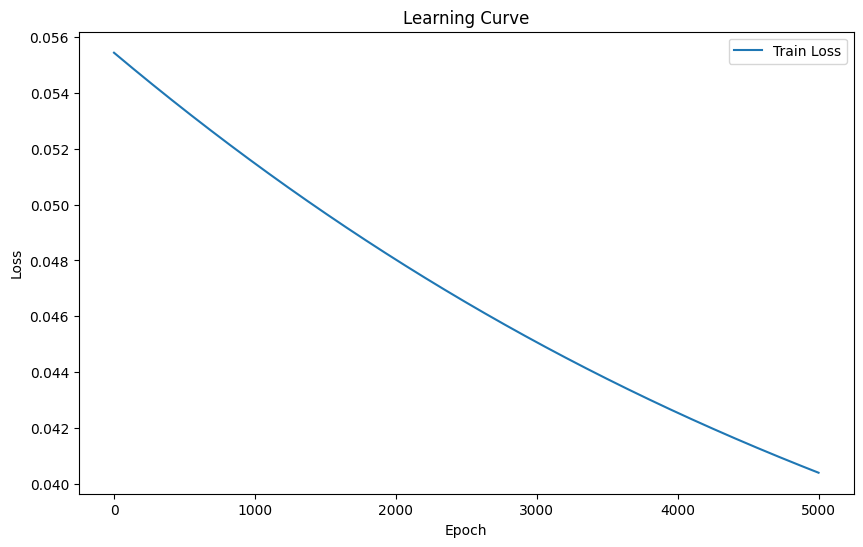

In [17]:
learning_curve(train_loss)

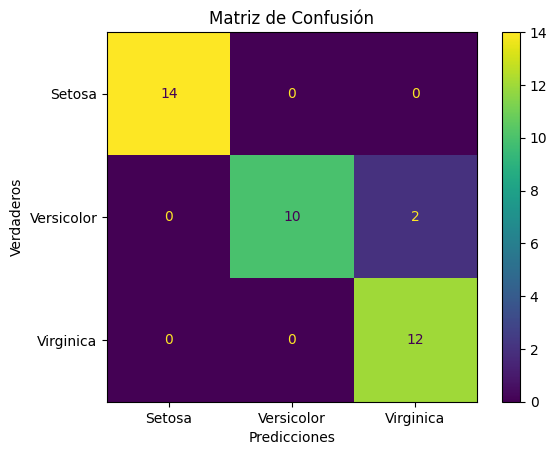

In [18]:
display_confusion_matrix_iris(y_true, y_pred)